## Analysing BTC and Etherium real-time data 
## Date: 20/1/22

In [21]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

Function that imports data from Cryptowatch (https://cryptowat.ch/)

In [3]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}eur/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

select the data for last 7 days

In [4]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2022-01-13 19:48:50.042950')

pull out BTC and Etherium data 

In [6]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-01-13 20:00:00,37319.35,37474.71,37133.15,37278.37,32.475449,1.210422e+06
2022-01-13 21:00:00,37298.19,37388.58,36971.37,37388.58,28.460915,1.055158e+06
2022-01-13 22:00:00,37388.19,37493.47,37291.54,37420.65,28.135101,1.052460e+06
2022-01-13 23:00:00,37427.08,37494.68,37101.44,37221.60,22.493209,8.375718e+05
2022-01-14 00:00:00,37200.00,37311.06,37119.04,37164.89,4.465525,1.662337e+05


In [7]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-01-13 20:00:00,2858.47,2872.62,2836.31,2857.13,178.082639,508128.113546
2022-01-13 21:00:00,2857.13,2857.26,2821.37,2857.26,328.665208,933585.001116
2022-01-13 22:00:00,2856.98,2863.70,2853.03,2858.62,112.076370,320241.461613
2022-01-13 23:00:00,2858.75,2862.17,2834.97,2837.36,57.905756,164965.014605
2022-01-14 00:00:00,2834.97,2850.88,2826.33,2831.80,85.238822,242187.555099


## Data Analysis - Descriptive Statistics

In [19]:
btc.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,168.000000,168.000000,168.000000,168.000000,168.000000,1.680000e+02
mean,37358.100655,37488.677857,37217.353929,37366.620774,21.200675,7.901893e+05
std,442.168012,439.797384,461.480212,448.262684,19.586537,7.302090e+05
min,36445.200000,36540.100000,36305.640000,36431.170000,0.901057,3.407024e+04
25%,36992.622500,37083.712500,36847.705000,36967.460000,7.206011,2.682417e+05
50%,37359.030000,37494.765000,37211.585000,37374.245000,15.529013,5.830174e+05
75%,37760.940000,37863.075000,37649.005000,37771.565000,28.469897,1.056472e+06
max,38198.690000,38417.800000,38174.680000,38202.620000,136.943443,5.148301e+06


In [20]:
eth.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,168.000000,168.000000,168.000000,168.000000,168.000000,1.680000e+02
mean,2841.781845,2853.605476,2828.174881,2841.756190,149.380101,4.208880e+05
std,68.740972,67.879619,70.760350,69.112967,145.072491,4.029345e+05
min,2702.050000,2709.190000,2687.690000,2699.450000,6.775580,1.865221e+04
25%,2780.572500,2789.897500,2760.915000,2778.092500,62.454245,1.776316e+05
50%,2852.220000,2858.615000,2836.875000,2852.695000,109.090289,3.037813e+05
75%,2907.640000,2917.052500,2897.092500,2907.102500,184.354103,5.239324e+05
max,2954.850000,2976.990000,2943.870000,2956.990000,1033.592981,2.867932e+06


Text(0.5, 1.0, 'Closing price ETH')

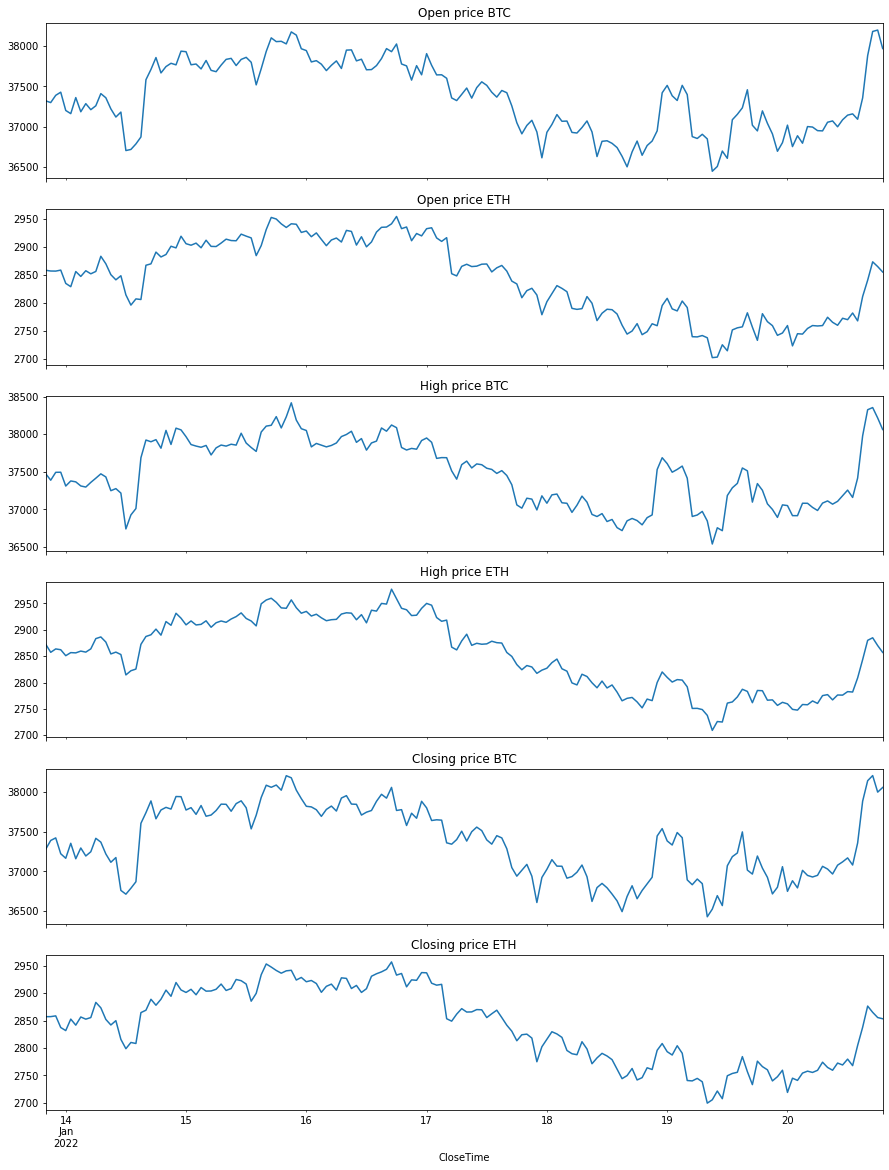

In [18]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, figsize = (15,20), sharex=True)
btc.OpenPrice.plot(ax = ax1)
eth.OpenPrice.plot(ax = ax2)
btc.HighPrice.plot(ax = ax3)
eth.HighPrice.plot(ax = ax4)
btc.ClosePrice.plot(ax = ax5)
eth.ClosePrice.plot(ax = ax6)

ax1.set_title('Open price BTC')
ax2.set_title('Open price ETH')
ax3.set_title('High price BTC')
ax4.set_title('High price ETH')
ax5.set_title('Closing price BTC')
ax6.set_title('Closing price ETH')

Dynamic plots with Bokeh

In [22]:
output_notebook()

Loading BokehJS ...

In [28]:
p1 = figure(x_axis_type='datetime', title='Crypto Prices', width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

#p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend= 'Bitcoin')
p1.line(eth.index, eth['ClosePrice'], color='green', legend = 'Etherium')

p1.legend.location = 'top_left'

show(p1)
